In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import folium

In [2]:
# Load Dataset

#Bangalore
b = pd.read_csv('../CSV Files/Bangalore_Cleaning.csv')

In [3]:
# Create the map
map_pickup = folium.Map(location=[b['Latitude'][0],b['Longitude'][0]])

# Adding the latitude and longitude points to the map.
b.apply(lambda row:folium.CircleMarker(location=[row["Latitude"], row["Longitude"]], color = 'red').add_to(map_pickup), axis=1)

# display the map: just ask for the object representation in juypter notebook.
map_pickup

In [4]:
# Drop the Latitude, Longitude, Location column and convert Longitude, Latitude as Radians

sb = b.drop('Location',axis=1)
sb['Radian Latitude'] = np.radians(sb['Latitude'])
sb['Radian Longitude'] = np.radians(sb['Longitude'])
sb = sb.drop(['Latitude','Longitude'],axis=1)

In [5]:
# Import MinMaxScaler, KMeans, KElbowVisualizer

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [6]:
# Create an instance of the MinMaxScaler
scaler = MinMaxScaler()

# Scale Data
sb = scaler.fit_transform(sb)

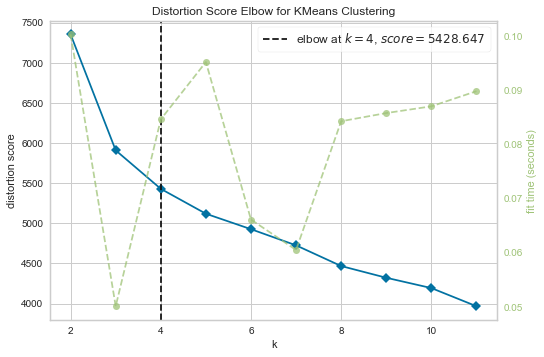

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))

visualizer.fit(sb)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [8]:
# Clusters for Bangalore

km_b = KMeans(n_clusters = 4, random_state=42).fit(sb)

In [9]:
# Create column for DataFrame

b['Clusters'] = km_b.labels_

In [10]:
b.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,Latitude,Longitude,Clusters
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,...,0,0,0,0,0,0,0,12.911915,77.579887,0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,...,0,0,0,0,0,0,0,13.042043,77.515906,1
2,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,12.971319,77.696477,3
3,6845000,1670,Kengeri,3,0,1,1,1,1,1,...,0,0,0,0,0,0,0,12.917657,77.483757,0
4,6797000,1220,Horamavu,2,0,0,1,1,1,1,...,0,0,0,0,0,0,0,13.027331,77.660151,0


In [11]:
# Drop Location, Latitude, and Longitude columns

b = b.drop(['Location','Latitude','Longitude'], axis = 1)

In [12]:
b.head()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,Clusters
0,30000000,3340,4,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,7888000,1045,2,0,0,1,1,1,1,1,...,0,1,0,0,0,0,0,0,0,1
2,8358000,1675,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,6845000,1670,3,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,6797000,1220,2,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
